[Datasets](https://www.kaggle.com/paultimothymooney/breast-histopathology-images/)

Implementación de un modelo de deep learning
Kathia Bejarano Zamora
A01378316

El cáncer de mama es una enfermedad maligna que se desarrolla en las células del tejido mamario. Es una de las formas más comunes de cáncer que afecta a las mujeres en todo el mundo. La detección temprana es crucial para un tratamiento efectivo y mejores resultados para los pacientes.


El uso de algoritmos de Machine Learning (ML) para la detección de cáncer de mama a través de imágenes médicas, como mamografías o imágenes por resonancia magnética (IRM), se ha convertido en un área de investigación muy interesante.

Los algoritmos de ML pueden entrenarse con conjuntos de datos que contienen imágenes médicas etiquetadas, lo que les permite aprender a reconocer características distintivas asociadas con el cáncer de mama.

Una vez entrenados, estos algoritmos pueden ser utilizados para analizar nuevas imágenes y proporcionar diagnósticos o detecciones preliminares que pueden ayudar a los profesionales de la salud a tomar decisiones más informadas.


In [4]:
#Importo las librerias necesarias

#Tensrflow para machine learning y redes neuronales
import tensorflow as tf

#Interacción con el sistema operativo
import os

#Cálculos numéricos
import numpy as np

#Estructura de datos y analítica de datos
import pandas as pd

#Visualización | gráficos
import matplotlib.pyplot as plt

#Herramienta para preprocesamiento y manipulación de imágenes
from tensorflow.keras.preprocessing import image

#Generador de datos
from keras.preprocessing.image import ImageDataGenerator

#Importa la métrica de crossentropy para clasificación
from tensorflow.keras.metrics import categorical_crossentropy

#Capas para construcción de red convolucional
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D

#Para creación de modelos de manera secuencial | capa por capa
from keras.models import Sequential, Model

#importación de ADAM que es un algrotimo para entrenamiento de mis redes neuronales
from keras.optimizers import Adam

#Biblioteca de visión por computadora
import cv2

In [5]:
#Utilizaremos como nuestra ruta principal esta carpeta
data = 'Breast/10264'

#Dentro de esta carpeta tenemos dos carpetas '0' indica las imágenes que fueron clasificadas sin cáncer y '1' con cáncer
No_Cancer_Mama = 'Breast/10264/0'
Si_Cancer_Mama = 'Breast/10264/1'

In [6]:
#Este bloque de código en Python está diseñado para generar una lista de rutas de archivo (listaR) y una lista de etiquetas (etiquetas) correspondientes para un conjunto de datos con imágenes de tejido mamario con y sin cáncer.

#Declaración de lista con dos variables (Cáncer o No Cáncer)
dirlist=[No_Cancer_Mama, Si_Cancer_Mama]

#lista con dos etiquetas ('No' y 'Si'), indicando las clases correspondientes a las imágenes. (con o sin cáncer)
clases=['No', 'Si']

listaR=[]
etiquetas=[]

#ciclo que recorre la lista con los archivos y para cada uno se crea la ruta y se va añadiendo a listaR para contar
for i,j in zip(dirlist, clases):
    filelist=os.listdir(i)
    for f in filelist:
        filepath=os.path.join (i,f)
        listaR.append(filepath)
        etiquetas.append(j)
print ('listaR: ', len(listaR), '   etiquetas: ', len(etiquetas))

listaR:  1204    etiquetas:  1204


In [7]:
#Crear un DataFrame usando pandas; Organizar mi lista de archivos (listaR) y sus etiquetas correspondientes (etiquetas).

#Serie que contiene los elementos de listaR
Files = pd.Series(listaR, name='listaR')

#Serie que contiene las etiquetas
Label=pd.Series(etiquetas, name='etiquetas')

#Creacion de un dataframe con 2 columnas fucionando las dos listas de arriba
df=pd.concat([Files,Label], axis=1)

#Ajuste a una matriz de 1204 filas con sus 2 columnas
df=pd.DataFrame(np.array(df).reshape(1204,2), columns = ['listaR', 'etiquetas'])
df.head()

,listaR,etiquetas
0,Breast/10264/0/10264_idx5_x551_y2051_class0.png,No
1,Breast/10264/0/10264_idx5_x1951_y1401_class0.png,No
2,Breast/10264/0/10264_idx5_x2501_y1101_class0.png,No
3,Breast/10264/0/10264_idx5_x2451_y651_class0.png,No
4,Breast/10264/0/10264_idx5_x2651_y1001_class0.png,No


In [8]:
#Muestra el recuento de valores punicos en la columna etiquetas
print(df['etiquetas'].value_counts())

No    617
Si    587
Name: etiquetas, dtype: int64


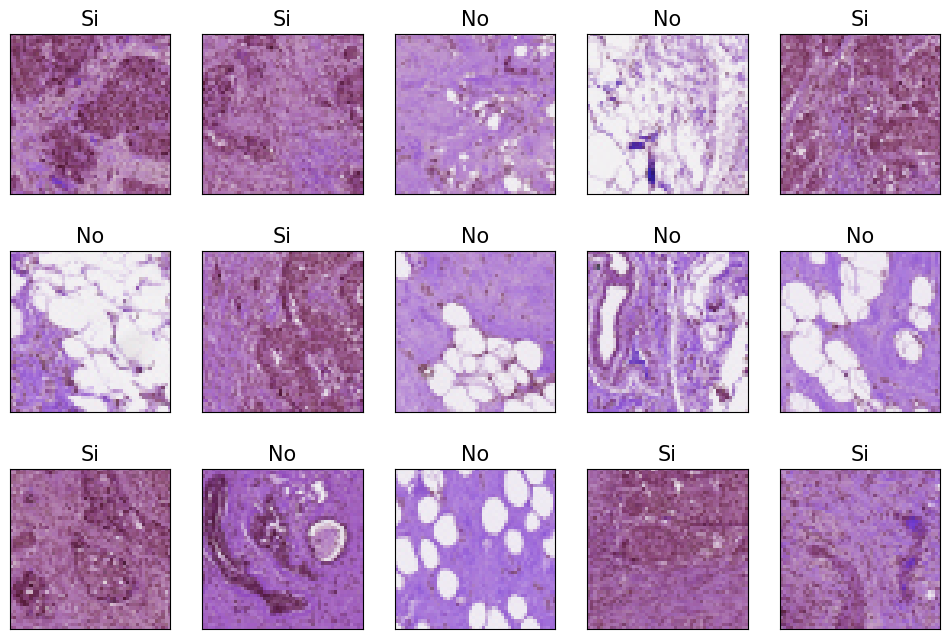

In [9]:
#Visualización de mis imágenes

#Creación de mi figura para mostrar las imágenes 12x8 pulgadas
plt.figure(figsize=(12,8))

#Iteración para mostrar 15 impágenes
for i in range(15):
    #Generación de número aleatorio para mostrar imágenes aleatorias
    random = np.random.randint(1,len(df))
    #3 filas y 5 columnas
    plt.subplot(3,5,i+1)
    #leer y mostrar la imagen
    plt.imshow(cv2.imread(df.loc[random,"listaR"]))
    #titulos
    plt.title(df.loc[random, "etiquetas"], size = 15, color = "black")
    #Ocultar mis ejes
    plt.xticks([])
    plt.yticks([])

plt.show()

In [10]:
#División de mi dataframe en conjuntos de entrenamiento prueba y validación
from sklearn.model_selection import train_test_split

#División de conjunto 95% entrenamiento 5% prueba
train, test = train_test_split(df, train_size=0.95, random_state=0)

#División en conjuntos de entrenamiento y validación 90% entrenamiento 10% validación
train_new, valid = train_test_split(train, train_size=0.90, random_state=0)

print(f"train set shape: {train_new.shape}")
print(f"test set shape: {test.shape}")
print(f"validation set shape: {valid.shape}")

train set shape: (1028, 2)
test set shape: (61, 2)
validation set shape: (115, 2)


La preparación de mis datos es fundamental para poder tener un proceso lineal en el entrenamiento de mi modelo. Algo importante a remarcar es que se realizó un aumento de datos (Data Augmentation): Se utiliza ImageDataGenerator de Keras para realizar el aumento de datos en el conjunto de entrenamiento (train_gen). Esto implica aplicar transformaciones como rotación, cambio de tamaño, desplazamiento, volteo horizontal y vertical a las imágenes para aumentar la variabilidad y mejorar la capacidad del modelo para generalizar.

Generadores de datos para entrenamiento, validación y prueba: Se configuran generadores de datos que proporcionan lotes de imágenes normalizadas y etiquetas para el entrenamiento, validación y prueba del modelo.

In [11]:
#En esta parte vamos a realizar aumentacipon de datos

#Normalizamos los valores de pixeles encontrados en un rango del 0 al 1, rotaremos en 40°, con desplazamientos horizontales y verticales, controlando el sesgo,zoom y el voltear horizontal y verticalmente
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,
                                   shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, vertical_flip =True)

#En este caso solo aplicamos la normalización para representar la situación real
test_datagen = ImageDataGenerator(rescale = 1.0/255.)


In [12]:
#Generador de datos,e stbalecemos el tamaño para normalizar la simágenes, definimos el tamaño del lote para entrenar, clasificación binaria y se shufflea para tener aletoriedad
train_gen = train_datagen.flow_from_dataframe(dataframe = train_new,
                                              x_col = 'listaR', y_col ='etiquetas',
                                              target_size = (224,224), batch_size = 32,
                                              class_mode = 'binary', shuffle = True)
#Sólo reducimos el tamaño del lote
val_gen = train_datagen.flow_from_dataframe(valid,
                                            target_size=(224,224), x_col = 'listaR', y_col ='etiquetas',
                                            class_mode='binary',
                                            batch_size= 16, shuffle=True)
#Aquí no shuffleamos para mantener situación real
test_gen = test_datagen.flow_from_dataframe(test,
                                            target_size = (224,224), x_col = 'listaR', y_col ='etiquetas',
                                             class_mode = 'binary',
                                            batch_size = 16, shuffle = False)

Found 1028 validated image filenames belonging to 2 classes.
Found 115 validated image filenames belonging to 2 classes.
Found 61 validated image filenames belonging to 2 classes.


In [13]:
#obtener los índices de las clases presentes en el conjunto de entrenamiento,
train_gen.class_indices

{'No': 0, 'Si': 1}

ResNet50V2 es una arquitectura de red neuronal convolucional (CNN) que pertenece a la familia de las Redes Neuronales Residuales (ResNet), desarrollada por Microsoft Research. Es una variante de ResNet que utiliza bloques residuales para mejorar el entrenamiento de redes más profundas.


-ResNet introduce bloques residuales que contienen conexiones "skip". Estas conexiones permiten que el gradiente 'fluya' más fácilmente durante el entrenamiento profundo, evitando el problema de desvanecimiento del gradiente. ResNet50V2 utiliza bloques residuales con 50 capas.

-Capas de convolución: ResNet50V2 está compuesta por múltiples capas de convolución y bloques residuales. La profundidad de la red se logra mediante la repetición de estos bloques residuales.

-Capas de agrupamiento y normalización: Además de las capas convolucionales, ResNet50V2 también incluye capas de agrupamiento (pooling layers) y capas de normalización (Batch Normalization). (Es por esta fusión que decid´í emplear esta arquitectura). La normalización por lotes ayuda a estabilizar y acelerar el entrenamiento al normalizar la activación de cada capa para que tenga una media cercana a cero y una desviación estándar cercana a uno.

-Función de activación: Se utiliza la función de activación ReLU (Rectified Linear Unit) en la mayoría de las capas convolucionales para introducir no linealidad en la red.

-Regularización y Normalización: Introduce técnicas de regularización como dropout y normalización por lotes para mejorar la generalización y estabilidad del modelo.


In [14]:
from tensorflow import keras

#Usaremos la arquitectura ResNet50V2
base_model = keras.applications.ResNet50V2(
    #Pesos preentrenados
    weights="imagenet",
    #Normalizar nuevamente imágenes para que no haya discrepancia
    input_shape=(224, 224, 3),
    #No incluir las capas más conectadas
    include_top=False,
)

# Bloqeuamso entrenamiento de los pesos
base_model.trainable = False

# Nuevo modelo
inputs = keras.Input(shape=(224, 224, 3))


#Tomamos la salida del modelo base y no se realiza entrenamiento
x = base_model(inputs, training=False)
#Agregamos una capa con el promedio global, reducimos la salida a un vector de features
x = keras.layers.GlobalAveragePooling2D()(x)
#Regularización pro medio de droput apagamos aleatoriamente algunas neuronas
x = keras.layers.Dropout(0.2)(x)

#Salida de clasificación binaria  con una activación sigmoide
outputs = keras.layers.Dense(1, activation="sigmoid")(x)

#Nuevo modelo que agarra inpusts.y porduce ls salidad
model = keras.Model(inputs, outputs)

#Resumen del modelo que se creó
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 23566849 (89.90 MB)
Trainable params: 2049 (8.00 KB)
Non-trainable params: 23564800 (89.89 MB)
__________________

In [15]:
#Guarda el modelo después de cada época si hay una mejora en la métrica.
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("Tumor_Cl_Mdl.h5", save_best_only=True, verbose = 0)
]


#Configura el modelo para el entrenamiento.
#Se elige 'binary_crossentropy' como función de pérdida ya que se trata de un problema de clasificación binaria.
#Se utiliza el optimizador Adam con una tasa de aprendizaje de 0.0001 y se monitorea la métrica de precisión ('accuracy').

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate= 0.0001), metrics=['accuracy'])

#Entrena el modelo con los datos proporcionados por los generadores de datos train_gen y val_gen durante 100 épocas.
#Los callbacks se utilizan para controlar el proceso de entrenamiento.
#verbose=1 muestra mi barrita de progreso durante el entrenamiento.

history = model.fit(train_gen, validation_data = val_gen, epochs = 100,
                    callbacks = [callbacks], verbose = 1)

Epoch 1/100
33/33 [==============================] - ETA: 0s - loss: 0.7308 - accuracy: 0.5545

/Users/kathbejarano/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


33/33 [==============================] - 35s 1s/step - loss: 0.7308 - accuracy: 0.5545 - val_loss: 0.6800 - val_accuracy: 0.6174
Epoch 2/100
33/33 [==============================] - 39s 1s/step - loss: 0.6498 - accuracy: 0.6216 - val_loss: 0.6207 - val_accuracy: 0.6609
Epoch 3/100
33/33 [==============================] - 38s 1s/step - loss: 0.6117 - accuracy: 0.6683 - val_loss: 0.5637 - val_accuracy: 0.7304
Epoch 4/100
33/33 [==============================] - 37s 1s/step - loss: 0.5664 - accuracy: 0.7140 - val_loss: 0.5714 - val_accuracy: 0.7478
Epoch 5/100
33/33 [==============================] - 36s 1s/step - loss: 0.5491 - accuracy: 0.7403 - val_loss: 0.5259 - val_accuracy: 0.7826
Epoch 6/100
33/33 [==============================] - 38s 1s/step - loss: 0.4966 - accuracy: 0.8006 - val_loss: 0.5036 - val_accuracy: 0.7826
Epoch 7/100
33/33 [==============================] - 37s 1s/step - loss: 0.4866 - accuracy: 0.7772 - val_loss: 0.4782 - val_accuracy: 0.8087
Epoch 8/100
33/33 [======

In [16]:
model.save("model.h5")#Guardar mi modelo

**Evaluating the model**

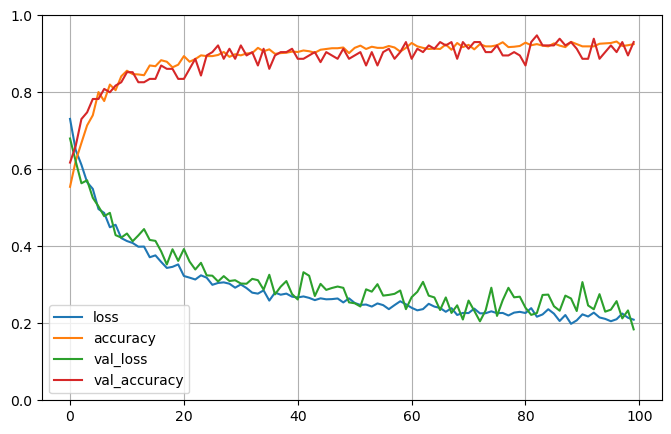

In [17]:
#Graficar el historico del comportamiento de mi entrenamiento
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
# Después de entrenar el modelo y guardar los checkpoints

# Importar librerías necesarias
from sklearn.metrics import confusion_matrix
import numpy as np

# Realizar predicciones en el conjunto de datos de validación
predictions = model.predict(val_gen)

# Convertir las predicciones a clases (0 o 1) basándonos en un umbral
# Por ejemplo, si la probabilidad predicha es mayor a 0.5, se asigna como clase 1, de lo contrario, clase 0
threshold = 0.5
predicted_classes = np.where(predictions > threshold, 1, 0)

# Obtener las verdaderas etiquetas del conjunto de datos de validación
true_classes = val_gen.classes

# Calcular la matriz de confusión
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(confusion_mtx)


8/8 [==============================] - 5s 510ms/step
Matriz de Confusión:
[[27 30]
 [28 30]]


In [19]:
from PIL import Image
model_path = "model.h5"
loaded_model = tf.keras.models.load_model(model_path)

# import matplotlib.pyplot as plt
import numpy as np

#Vamos a leer una imagen que venga en el set de datos
image = cv2.imread('Breast/10264/0/10264_idx5_x51_y1751_class0.png')

#Normlizamos y preparamos la imagen
image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((224, 224))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
if pred >= 0.5:
  print("Detección de Cáncer")
else:
  print("No se detecta Cáncer")

1/1 [==============================] - 0s 416ms/step
No se detecta Cáncer


In [20]:
train_gen.class_indices

{'No': 0, 'Si': 1}

In [22]:
from PIL import Image
import cv2
import numpy as np
import tensorflow as tf

model_path = "model.h5"
loaded_model = tf.keras.models.load_model(model_path)

while True:
    image_path = input("Introduce la ruta de la imagen (o escribe 'salir' para terminar): ")

    if image_path.lower() == 'salir':
        break  # Salir del bucle si el usuario escribe 'salir'
    
    try:
        image = cv2.imread(image_path)

        if image is None:
            print("No se pudo cargar la imagen. Introduce una ruta válida.")
            continue  # Volver a solicitar la ruta de la imagen si no se puede cargar

        # Normalizar y preparar la imagen
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((224, 224))
        expand_input = np.expand_dims(resize_image, axis=0)
        input_data = np.array(expand_input)
        input_data = input_data / 255

        pred = loaded_model.predict(input_data)
        if pred >= 0.5:
            print("Detección de Cáncer")
        else:
            print("No se detecta Cáncer")

    except Exception as e:
        print("Ocurrió un error:", e)


1/1 [==============================] - 0s 463ms/step
Detección de Cáncer
1/1 [==============================] - 0s 66ms/step
Detección de Cáncer
1/1 [==============================] - 0s 65ms/step
Detección de Cáncer
1/1 [==============================] - 0s 65ms/step
No se detecta Cáncer
1/1 [==============================] - 0s 56ms/step
No se detecta Cáncer
1/1 [==============================] - 0s 143ms/step
Detección de Cáncer
